# TP4 Deep Learning NLP : 
> Ce TP est effectué par :
**Sandra Mourali**- **Anas Chaibi** - **Salma Ghabri** - **Aziz Bellaaj** - **Louay Badri**
---

# Importation des bibliothèques


In [35]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot

# from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential

# from keras.layers.core import Activation, Dropout, Dense
from keras.utils import pad_sequences
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM, Embedding

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

# Importation du dataset


In [36]:
!wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2024-05-06 13:53:05--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv.2’

IMDB-Dataset.csv.2  100%[===================>]  63.14M   216MB/s    in 0.3s    

2024-05-06 13:53:06 (216 MB/s) - ‘IMDB-Dataset.csv.2’ saved [66212309/66212309]



In [37]:
imdb = pd.read_csv("IMDB-Dataset.csv")

In [38]:
imdb.info()
imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


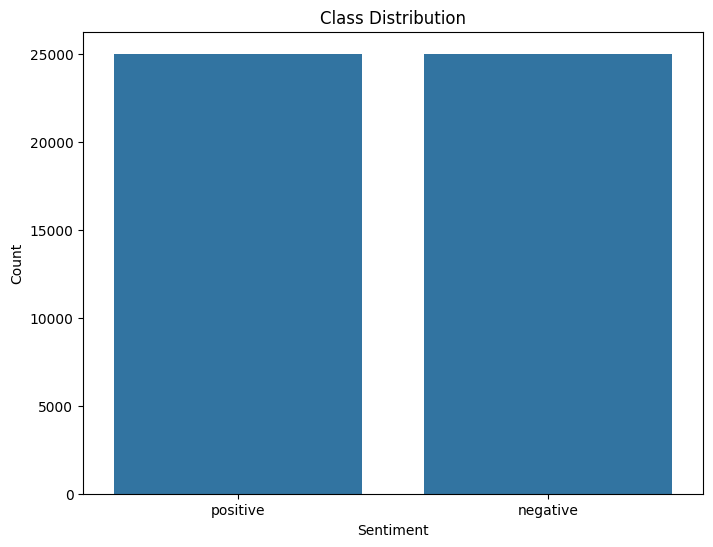

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x="sentiment", data=imdb)
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [40]:
imdb.iloc[3]

review       Basically there's a family where a little boy ...
sentiment                                             negative
Name: 3, dtype: object

# Prétraitement


## Nettoyer les données textuelles


In [41]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", " ", sentence)
    # Removing multiple spaces
    sentence = re.sub(r"\s+", " ", sentence)
    return sentence


TAG_RE = re.compile(r"<[^>]+>")


def remove_tags(text):
    return TAG_RE.sub("", text)

In [42]:
X = []
sentences = list(imdb["review"])
for sen in sentences:
    X.append(preprocess_text(sen))

In [43]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

## Convertir les étiquettes en chiffres


In [44]:
y = imdb["sentiment"]
y = np.array(list(map(lambda x: 1 if x == "positive" else 0, y)))

## Diviser le dataset en training et test sets


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# La couche de l’embedding


## Dictionnaire word-to-index


In [46]:
tokenizer = Tokenizer(num_words=5000)  # top 5000 most frequent words
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [47]:
X_train[3]

[8,
 1547,
 247,
 2628,
 5,
 443,
 4385,
 1871,
 14,
 30,
 31,
 1062,
 390,
 4,
 968,
 119,
 22,
 118,
 4197,
 29,
 44,
 3,
 1,
 17,
 78,
 118,
 4125,
 122,
 502,
 18,
 2,
 31,
 37,
 555,
 4,
 25,
 2839,
 1,
 2628,
 221,
 77,
 4,
 170,
 1663,
 777,
 57,
 59,
 924,
 7,
 44,
 1974,
 950,
 1164,
 3355,
 57,
 376,
 754,
 264,
 30,
 1318,
 1746,
 1326,
 31,
 376,
 529,
 1135,
 491,
 19,
 4,
 736,
 745,
 701,
 39,
 3,
 1,
 1320,
 3,
 251,
 7,
 8,
 407,
 1,
 103,
 2654,
 1749,
 3813,
 1420,
 3515,
 7,
 1,
 125,
 46,
 130,
 147,
 749,
 9,
 8,
 16,
 266,
 52,
 1975,
 3,
 1,
 3,
 3626,
 13,
 1,
 57,
 6,
 3735,
 7,
 430,
 752,
 2,
 9,
 6,
 5,
 1428,
 4,
 1563,
 2543,
 51,
 1,
 2037,
 15,
 610,
 94,
 1064,
 276,
 3,
 2,
 36,
 1415,
 14,
 57,
 2990,
 2628,
 63,
 29,
 87,
 428,
 332,
 3432]

La taille de chaque liste est différente car les phrases possèdent des tailles différentes.
Le script ci-dessous trouve la taille du vocabulaire, puis effectue un remplissage sur
l'ensemble d'entraînement et de test.


In [48]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)

In [49]:
vocab_size

92547

Les listes ont la même longueur, c'est-à-dire 100. De plus, la variable vocabulary_size contient maintenant une valeur 92547, ce qui signifie que le corpus contient 92547 mots uniques.


## GloVe : Global Vectors for Word Representation


In [50]:
!unzip "glove.6B.zip"


Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


Créons un dictionnaire qui contiendra des mots en tant que clés et leur liste d’embeddings correspondante en tant que valeurs.


In [51]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for i in range(5):
    line = glove_file.readline()
    print(line)
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype="float32")
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

Enfin, nous allons créer une matrice d’embeddings où chaque numéro de ligne
correspondra à l'index du mot dans le corpus. La matrice aura 100 colonnes où chaque
colonne contiendra les embeddings GloVe pour les mots de notre corpus.


In [52]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [53]:
embedding_matrix[7]

array([ 0.085703  , -0.22201   ,  0.16569   ,  0.13372999,  0.38238999,
        0.35400999,  0.01287   ,  0.22461   , -0.43816999,  0.50164002,
       -0.35874   , -0.34983   ,  0.055156  ,  0.69647998, -0.17958   ,
        0.067926  ,  0.39100999,  0.16039   , -0.26635   , -0.21138   ,
        0.53697997,  0.49379   ,  0.93660003,  0.66902   ,  0.21793   ,
       -0.46641999,  0.22383   , -0.36204001, -0.17656   ,  0.17479999,
       -0.20367   ,  0.13931   ,  0.019832  , -0.10413   , -0.20243999,
        0.55002999, -0.15459999,  0.98654997, -0.26863   , -0.29089999,
       -0.32866001, -0.34187999, -0.16943   , -0.42001   , -0.046727  ,
       -0.16327   ,  0.70823997, -0.74910998, -0.091559  , -0.96178001,
       -0.19746999,  0.10282   ,  0.55220997,  1.38160002, -0.65635997,
       -3.25020003, -0.31556001, -1.20550001,  1.77090001,  0.40259999,
       -0.79826999,  1.15970004, -0.33041999,  0.31382   ,  0.77385998,
        0.22595   ,  0.52471   , -0.034053  ,  0.32047999,  0.07

# Modelisation


## A. Classification avec un simple réseau de neurones


In [54]:
# from keras.models import Sequential
# from keras.layers import Embedding, Flatten, Dense

# Création du modèle séquentiel
ann_model = Sequential()

# Ajout de la couche d'embedding
ann_model.add(
    Embedding(
        vocab_size,
        100,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False,
    )
)

# Ajout de la couche Flatten
ann_model.add(Flatten())

# Ajout de la couche Dense
ann_model.add(Dense(units=1, activation="sigmoid"))

# Compilation du modèle
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

# Entraînement du modèle
history = ann_model.fit(
    X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2
)

Epoch 1/6
250/250 [==============================] - 3s 4ms/step - loss: 0.6022 - acc: 0.6711 - val_loss: 0.5743 - val_acc: 0.6963
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4981 - acc: 0.7624 - val_loss: 0.5169 - val_acc: 0.7450
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4591 - acc: 0.7848 - val_loss: 0.5206 - val_acc: 0.7425
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4330 - acc: 0.8019 - val_loss: 0.5295 - val_acc: 0.7383
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4202 - acc: 0.8077 - val_loss: 0.5324 - val_acc: 0.7416
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4055 - acc: 0.8165 - val_loss: 0.5392 - val_acc: 0.7340


In [55]:
score = ann_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5409 - acc: 0.7459
Test Score: 0.5409328937530518
Test Accuracy: 0.7458999752998352


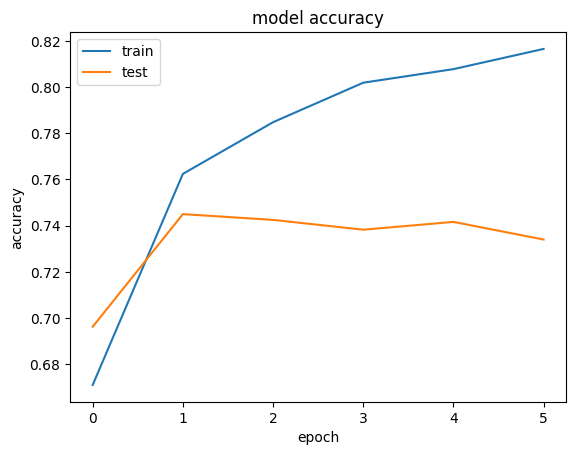

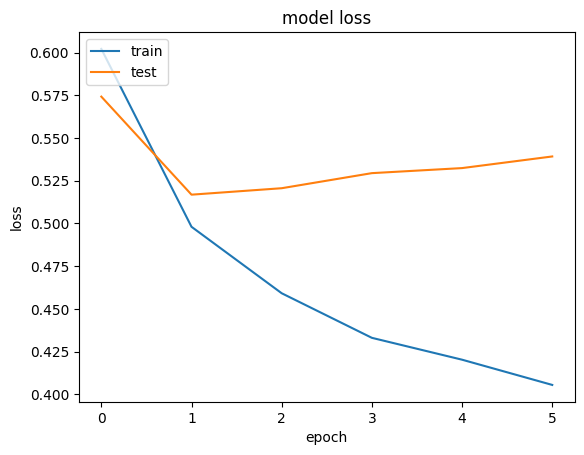

In [56]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## B. Classification avec un réseau de neurones convolutionnel


In [57]:
from keras.layers import Conv1D, MaxPooling1D

cnn_model = Sequential()

cnn_model.add(
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen)
)

cnn_model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))

cnn_model.add(MaxPooling1D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1, activation="sigmoid"))

cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

history = cnn_model.fit(
    X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2
)

Epoch 1/6
250/250 [==============================] - 26s 94ms/step - loss: 0.5204 - acc: 0.7262 - val_loss: 0.3678 - val_acc: 0.8397
Epoch 2/6
250/250 [==============================] - 8s 32ms/step - loss: 0.3153 - acc: 0.8663 - val_loss: 0.3432 - val_acc: 0.8519
Epoch 3/6
250/250 [==============================] - 5s 21ms/step - loss: 0.2495 - acc: 0.9000 - val_loss: 0.3307 - val_acc: 0.8611
Epoch 4/6
250/250 [==============================] - 3s 10ms/step - loss: 0.1777 - acc: 0.9351 - val_loss: 0.3612 - val_acc: 0.8537
Epoch 5/6
250/250 [==============================] - 3s 14ms/step - loss: 0.1152 - acc: 0.9642 - val_loss: 0.3798 - val_acc: 0.8562
Epoch 6/6
250/250 [==============================] - 4s 15ms/step - loss: 0.0589 - acc: 0.9887 - val_loss: 0.4646 - val_acc: 0.8456


In [58]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4380 - acc: 0.8440
Test Score: 0.4379511773586273
Test Accuracy: 0.843999981880188


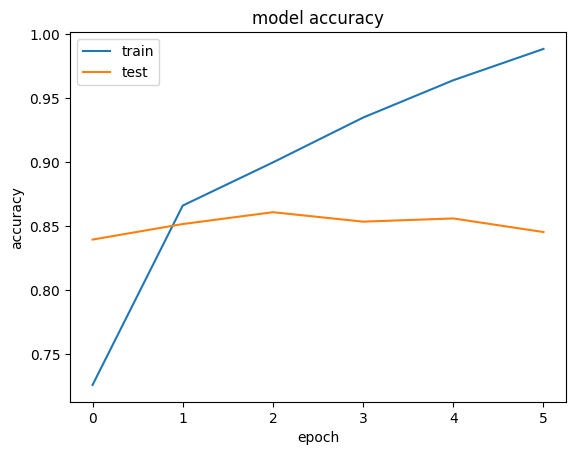

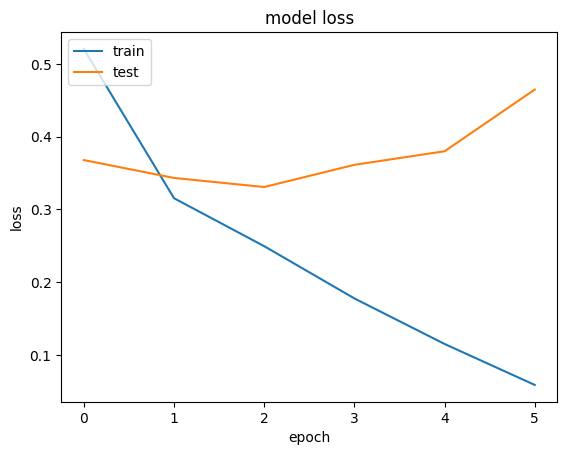

In [59]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## C. Classification avec un réseau de neurones récurrent (LSTM)


In [60]:
lstm_model = Sequential()

lstm_model.add(
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen)
)

lstm_model.add(LSTM(units=128))

lstm_model.add(Dense(units=1, activation="sigmoid"))

lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

history = lstm_model.fit(
    X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2
)

Epoch 1/6
250/250 [==============================] - 19s 68ms/step - loss: 0.4951 - acc: 0.7570 - val_loss: 0.4060 - val_acc: 0.8271
Epoch 2/6
250/250 [==============================] - 7s 29ms/step - loss: 0.3350 - acc: 0.8586 - val_loss: 0.3470 - val_acc: 0.8568
Epoch 3/6
250/250 [==============================] - 4s 17ms/step - loss: 0.2892 - acc: 0.8824 - val_loss: 0.3255 - val_acc: 0.8602
Epoch 4/6
250/250 [==============================] - 4s 16ms/step - loss: 0.2588 - acc: 0.8960 - val_loss: 0.3850 - val_acc: 0.8410
Epoch 5/6
250/250 [==============================] - 5s 19ms/step - loss: 0.2321 - acc: 0.9082 - val_loss: 0.3540 - val_acc: 0.8590
Epoch 6/6
250/250 [==============================] - 4s 15ms/step - loss: 0.2121 - acc: 0.9180 - val_loss: 0.3447 - val_acc: 0.8619


In [61]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3274 - acc: 0.8685
Test Score: 0.3274381458759308
Test Accuracy: 0.8684999942779541


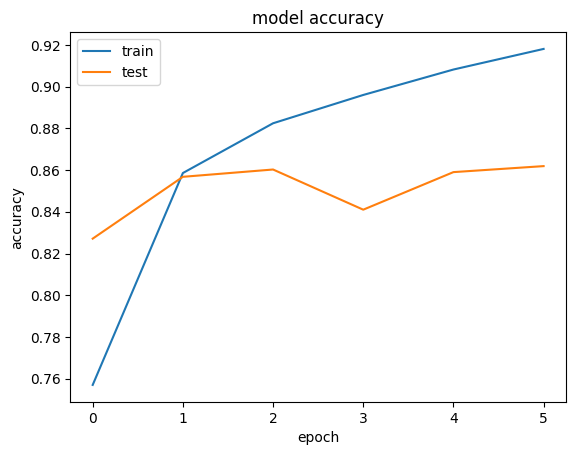

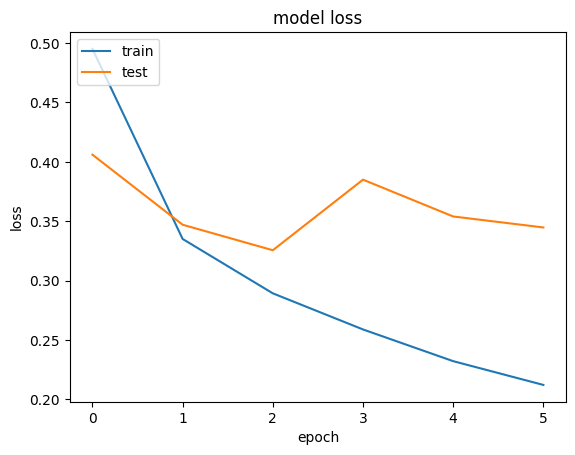

In [62]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

- l'accuracy du 1er classifieur (un simple réseau de neurones): 0.843999981880188
- l'accuracy du 2eme classifieur (CNN): 0.8684999942779541
- l'accuracy du 3eme classifieur (LSTM): 0.8684999942779541

In [63]:
single_input_data = X_test[4]
input_data = np.array([single_input_data])
predicted_prob = lstm_model.predict(input_data)

predicted_class = int(np.round(predicted_prob))

print("Predicted Probability:", predicted_prob)
print("Predicted Class:", predicted_class)
print("correct Class:", y_test[4])

1/1 [==============================] - 0s 497ms/step
Predicted Probability: [[0.00575791]]
Predicted Class: 0
correct Class: 0


<ipython-input-63-0ded7bee6307>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(np.round(predicted_prob))


# Comparaison embedding / classifieur


## Utils


In [64]:
def plot_results(history):
    plt.plot(history.history["acc"])
    plt.plot(history.history["val_acc"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


def evaluate_model(model):
    score = model.evaluate(X_test, y_test, verbose=0)
    print("Test Score:", score[0])
    print("Test Accuracy:", score[1])

## Models


In [65]:
from keras.layers import GRU

from keras.callbacks import EarlyStopping


def train_lstm(out_dim):
    lstm_model = Sequential()

    lstm_model.add(
        Embedding(vocab_size, out_dim, weights=[embedding_matrix], input_length=maxlen)
    )

    lstm_model.add(LSTM(units=128))

    lstm_model.add(Dense(units=1, activation="sigmoid"))

    lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

    early_stopping = EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    history = lstm_model.fit(
        X_train,
        y_train,
        epochs=6,
        batch_size=128,
        verbose=1,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    return lstm_model, history


def train_cnn_rnn(out_dim):
    model = Sequential()

    model.add(
        Embedding(vocab_size, out_dim, weights=[embedding_matrix], input_length=maxlen)
    )

    model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))

    model.add(MaxPooling1D())
    model.add(LSTM(units=128))

    model.add(Flatten())

    model.add(Dense(units=1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

    early_stopping = EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=6,
        batch_size=128,
        verbose=1,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    return model, history


def train_gru(out_dim):
    model = Sequential()

    model.add(
        Embedding(vocab_size, out_dim, weights=[embedding_matrix], input_length=maxlen)
    )

    model.add(GRU(units=128))

    model.add(Flatten())

    model.add(Dense(units=1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

    early_stopping = EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=6,
        batch_size=128,
        verbose=1,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    return model, history

In [66]:
def experience(out_dim, train):
    model, history = train(out_dim)
    plot_results(history)
    evaluate_model(model)

Epoch 1/6
250/250 [==============================] - 19s 68ms/step - loss: 0.4803 - acc: 0.7590 - val_loss: 0.3589 - val_acc: 0.8410
Epoch 2/6
250/250 [==============================] - 6s 23ms/step - loss: 0.3188 - acc: 0.8643 - val_loss: 0.3220 - val_acc: 0.8640
Epoch 3/6
250/250 [==============================] - 5s 18ms/step - loss: 0.2658 - acc: 0.8917 - val_loss: 0.3205 - val_acc: 0.8729
Epoch 4/6
250/250 [==============================] - 3s 14ms/step - loss: 0.2185 - acc: 0.9134 - val_loss: 0.3990 - val_acc: 0.8491
Epoch 5/6
250/250 [==============================] - 4s 15ms/step - loss: 0.1741 - acc: 0.9347 - val_loss: 0.3581 - val_acc: 0.8639
Epoch 6/6
250/250 [==============================] - 4s 14ms/step - loss: 0.1233 - acc: 0.9552 - val_loss: 0.4546 - val_acc: 0.8486


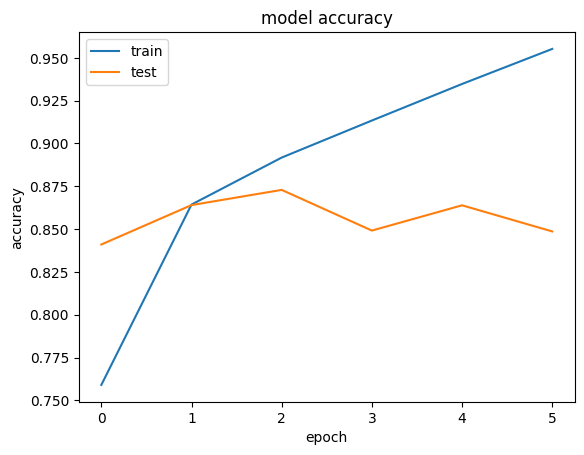

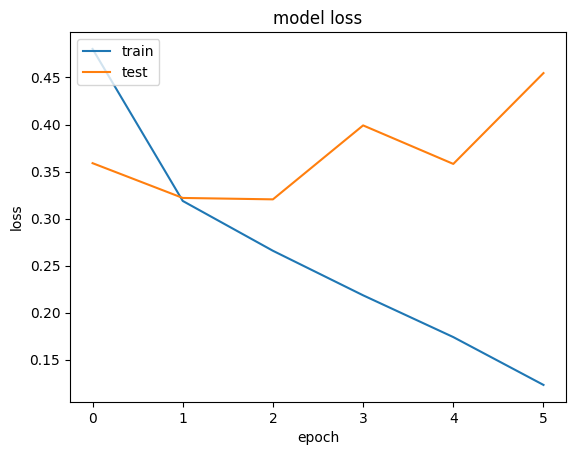

Test Score: 0.3101549744606018
Test Accuracy: 0.8682000041007996


In [67]:
experience(100, train_cnn_rnn)

Epoch 1/6
250/250 [==============================] - 18s 64ms/step - loss: 0.4999 - acc: 0.7400 - val_loss: 0.3550 - val_acc: 0.8434
Epoch 2/6
250/250 [==============================] - 8s 32ms/step - loss: 0.3097 - acc: 0.8681 - val_loss: 0.3287 - val_acc: 0.8565
Epoch 3/6
250/250 [==============================] - 5s 19ms/step - loss: 0.2612 - acc: 0.8938 - val_loss: 0.3151 - val_acc: 0.8699
Epoch 4/6
250/250 [==============================] - 4s 17ms/step - loss: 0.2266 - acc: 0.9110 - val_loss: 0.3282 - val_acc: 0.8683
Epoch 5/6
250/250 [==============================] - 3s 14ms/step - loss: 0.1982 - acc: 0.9246 - val_loss: 0.3503 - val_acc: 0.8637
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1719 - acc: 0.9369 - val_loss: 0.3652 - val_acc: 0.8574


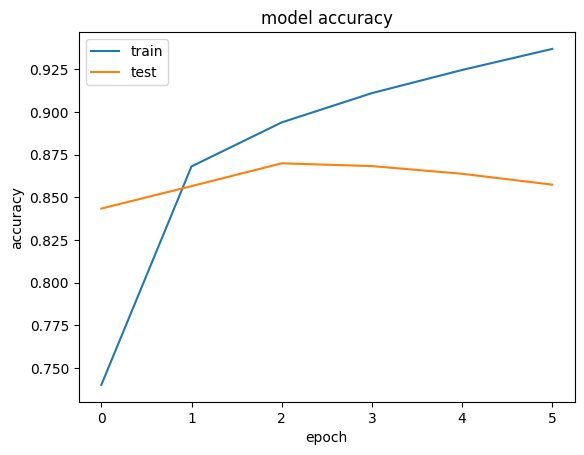

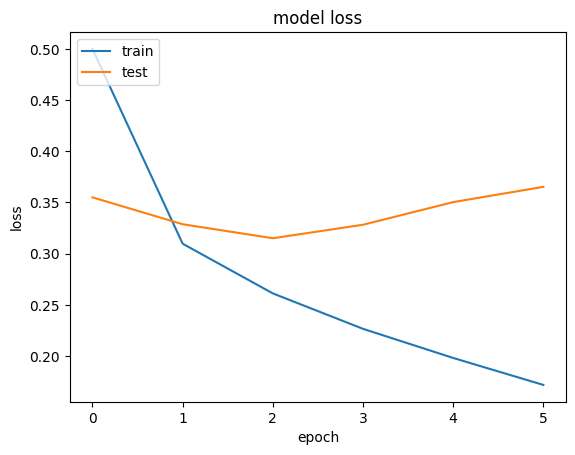

Test Score: 0.30809563398361206
Test Accuracy: 0.8704000115394592


In [68]:
experience(100, train_gru)


| Modèle    | Glove              |
| --------- | ------------------ |
| LSTM      | .8655 |
| CNN + RNN | .8672 |
| GRU       | .8768 |


## word2vec


In [69]:
!wget https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz

--2024-05-06 13:57:30--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M  17.6MB/s    in 5.2s    

2024-05-06 13:57:39 (50.5 MB/s) - ‘GoogleNews-vectors-negative300-SLIM.bin.gz’ saved [276467217/276467217]



In [70]:
!gunzip /content/GoogleNews-vectors-negative300-SLIM.bin.gz


In [71]:
from gensim.models import KeyedVectors

# Load word2vec model
word2vec_model = KeyedVectors.load_word2vec_format(
    "/content/GoogleNews-vectors-negative300-SLIM.bin", binary=True
)

# Create an empty dictionary to store word vectors
embeddings_dictionary = {}

# Iterate through the word2vec model vocabulary and store word vectors in the dictionary
for word in word2vec_model.key_to_index:
    embeddings_dictionary[word] = word2vec_model[word]

# Initialize the embedding matrix with zeros
embedding_matrix = zeros((vocab_size, word2vec_model.vector_size))

# Iterate through tokenizer word index and update the embedding matrix with word vectors
for word, index in tokenizer.word_index.items():
    if word in embeddings_dictionary:
        embedding_matrix[index] = embeddings_dictionary[word]

In [72]:
from scipy.spatial.distance import cosine

# Calculate cosine similarity between "dog" and "cat"
dog_embedding = embedding_matrix[tokenizer.word_index["dog"]]
cat_embedding = embedding_matrix[tokenizer.word_index["cat"]]
similarity = 1 - cosine(dog_embedding, cat_embedding)
print(f"Similarity between 'dog' and 'cat': {similarity:.2f}")

Similarity between 'dog' and 'cat': 0.76


In [73]:
embedding_matrix.shape[1]

300

Epoch 1/6
250/250 [==============================] - 28s 102ms/step - loss: 0.4150 - acc: 0.8026 - val_loss: 0.3592 - val_acc: 0.8425
Epoch 2/6
250/250 [==============================] - 11s 46ms/step - loss: 0.2928 - acc: 0.8802 - val_loss: 0.3416 - val_acc: 0.8547
Epoch 3/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2490 - acc: 0.8992 - val_loss: 0.3839 - val_acc: 0.8506
Epoch 4/6
250/250 [==============================] - 7s 30ms/step - loss: 0.2123 - acc: 0.9169 - val_loss: 0.3696 - val_acc: 0.8434
Epoch 5/6
250/250 [==============================] - 6s 24ms/step - loss: 0.1782 - acc: 0.9311 - val_loss: 0.4175 - val_acc: 0.8461


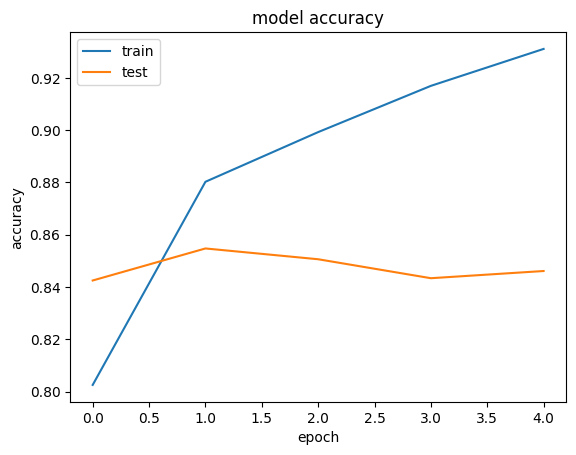

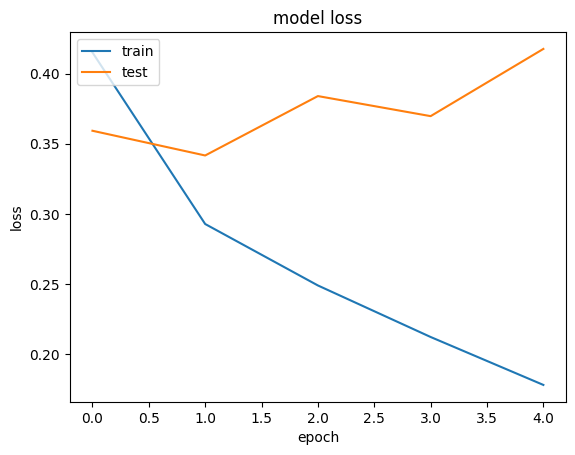

Test Score: 0.32472947239875793
Test Accuracy: 0.8626999855041504


In [74]:
experience(embedding_matrix.shape[1], train_lstm)

Epoch 1/6
250/250 [==============================] - 22s 80ms/step - loss: 0.3929 - acc: 0.8143 - val_loss: 0.3555 - val_acc: 0.8422
Epoch 2/6
250/250 [==============================] - 8s 32ms/step - loss: 0.2631 - acc: 0.8932 - val_loss: 0.3080 - val_acc: 0.8687
Epoch 3/6
250/250 [==============================] - 6s 24ms/step - loss: 0.2017 - acc: 0.9242 - val_loss: 0.3759 - val_acc: 0.8576
Epoch 4/6
250/250 [==============================] - 6s 25ms/step - loss: 0.1329 - acc: 0.9539 - val_loss: 0.3726 - val_acc: 0.8621
Epoch 5/6
250/250 [==============================] - 5s 21ms/step - loss: 0.0685 - acc: 0.9792 - val_loss: 0.4265 - val_acc: 0.8577


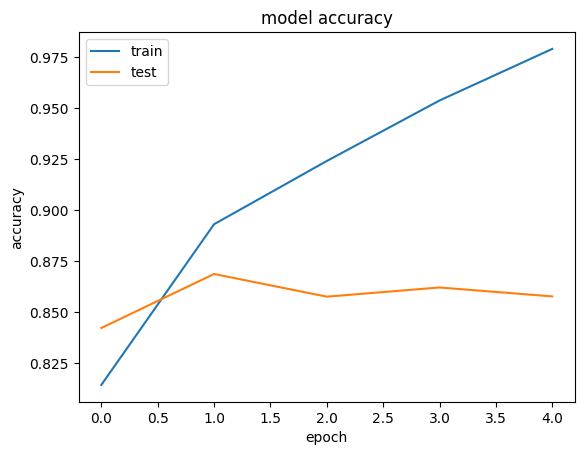

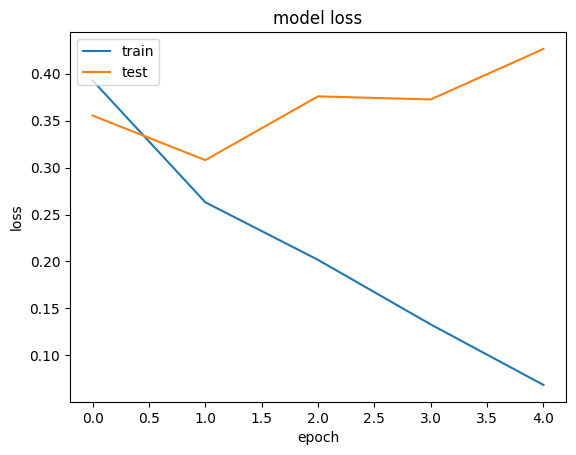

Test Score: 0.29192423820495605
Test Accuracy: 0.8744999766349792


In [75]:
experience(embedding_matrix.shape[1], train_cnn_rnn)

Epoch 1/6
250/250 [==============================] - 20s 74ms/step - loss: 0.4526 - acc: 0.7777 - val_loss: 0.3672 - val_acc: 0.8481
Epoch 2/6
250/250 [==============================] - 7s 30ms/step - loss: 0.2915 - acc: 0.8825 - val_loss: 0.3245 - val_acc: 0.8649
Epoch 3/6
250/250 [==============================] - 6s 23ms/step - loss: 0.2340 - acc: 0.9081 - val_loss: 0.3387 - val_acc: 0.8640
Epoch 4/6
250/250 [==============================] - 6s 22ms/step - loss: 0.1884 - acc: 0.9291 - val_loss: 0.3651 - val_acc: 0.8606
Epoch 5/6
250/250 [==============================] - 5s 22ms/step - loss: 0.1500 - acc: 0.9461 - val_loss: 0.4169 - val_acc: 0.8534


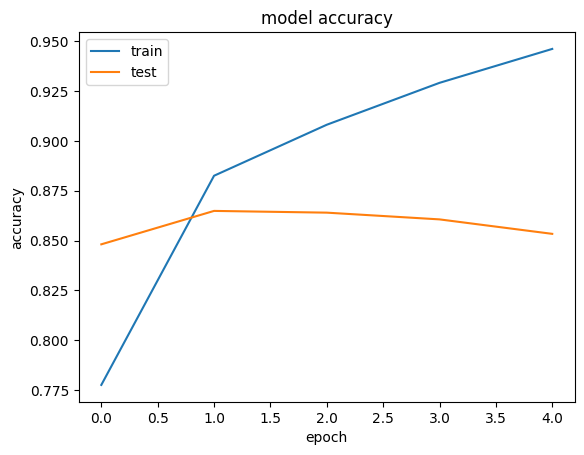

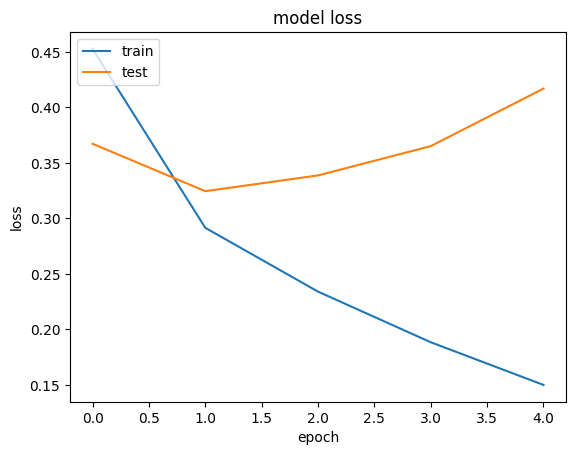

Test Score: 0.3167116343975067
Test Accuracy: 0.8637999892234802


In [76]:
experience(embedding_matrix.shape[1], train_gru)

| Modèle    | Word2vec |
| --------- | ----- |
| LSTM      | 0.863 |
| CNN + RNN | 0.872 |
| GRU       | 0.861 |


## [fasttext](https://www.kaggle.com/code/vsmolyakov/keras-cnn-with-fasttext-embeddings)


In [77]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

--2024-05-06 14:01:26--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.19, 3.162.163.11, 3.162.163.34, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G   176MB/s    in 49s     

2024-05-06 14:02:15 (130 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



In [78]:
import codecs

embeddings_dictionary = {}
f = codecs.open("wiki.en.vec", encoding="utf-8")
for line in f:
    values = line.rstrip().rsplit(" ")
    word = values[0]
    coef = np.asarray(values[1:], dtype="float32")
    embeddings_dictionary[word] = coef
f.close()

In [79]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        if embedding_vector.shape == (0,):
            continue
        embedding_matrix[index] = embedding_vector

In [80]:
embedding_matrix[200].shape

(300,)

In [81]:
# Calculate cosine similarity between "dog" and "cat"
dog_embedding = embedding_matrix[tokenizer.word_index["dog"]]
cat_embedding = embedding_matrix[tokenizer.word_index["cat"]]
similarity = 1 - cosine(dog_embedding, cat_embedding)
print(f"Similarity between 'dog' and 'cat': {similarity:.2f}")

Similarity between 'dog' and 'cat': 0.64


In [82]:
# import fasttext.util

# fasttext.util.download_model('en', if_exists='ignore')
# ft = fasttext.load_model('cc.en.300.bin')

Epoch 1/6
250/250 [==============================] - 31s 98ms/step - loss: 0.4421 - acc: 0.7884 - val_loss: 0.3543 - val_acc: 0.8508
Epoch 2/6
250/250 [==============================] - 12s 48ms/step - loss: 0.3077 - acc: 0.8737 - val_loss: 0.3317 - val_acc: 0.8583
Epoch 3/6
250/250 [==============================] - 8s 32ms/step - loss: 0.2663 - acc: 0.8924 - val_loss: 0.3428 - val_acc: 0.8553
Epoch 4/6
250/250 [==============================] - 6s 25ms/step - loss: 0.2309 - acc: 0.9095 - val_loss: 0.3543 - val_acc: 0.8570
Epoch 5/6
250/250 [==============================] - 7s 27ms/step - loss: 0.2068 - acc: 0.9204 - val_loss: 0.3653 - val_acc: 0.8516


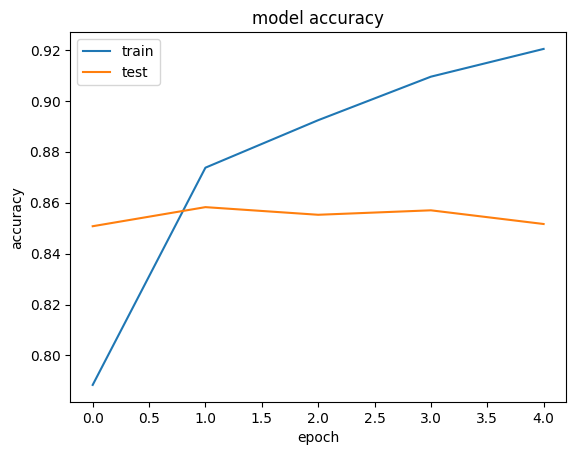

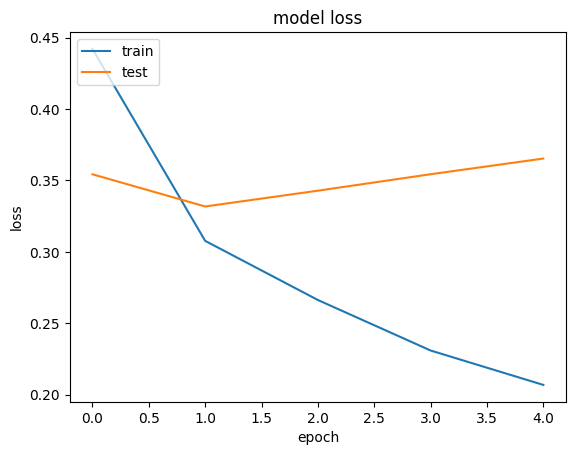

Test Score: 0.3214128315448761
Test Accuracy: 0.858299970626831


In [83]:
experience(embedding_matrix.shape[1], train_lstm)

Epoch 1/6
250/250 [==============================] - 29s 101ms/step - loss: 0.4312 - acc: 0.7935 - val_loss: 0.3836 - val_acc: 0.8328
Epoch 2/6
250/250 [==============================] - 10s 39ms/step - loss: 0.2816 - acc: 0.8845 - val_loss: 0.3388 - val_acc: 0.8514
Epoch 3/6
250/250 [==============================] - 8s 33ms/step - loss: 0.2273 - acc: 0.9104 - val_loss: 0.3998 - val_acc: 0.8150
Epoch 4/6
250/250 [==============================] - 7s 28ms/step - loss: 0.1786 - acc: 0.9319 - val_loss: 0.3467 - val_acc: 0.8652
Epoch 5/6
250/250 [==============================] - 7s 28ms/step - loss: 0.1156 - acc: 0.9614 - val_loss: 0.3640 - val_acc: 0.8602


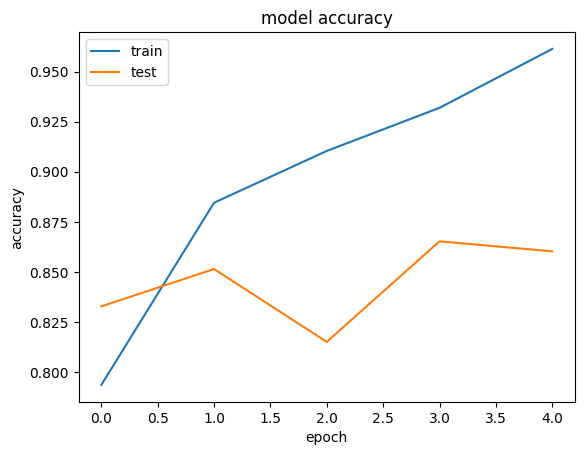

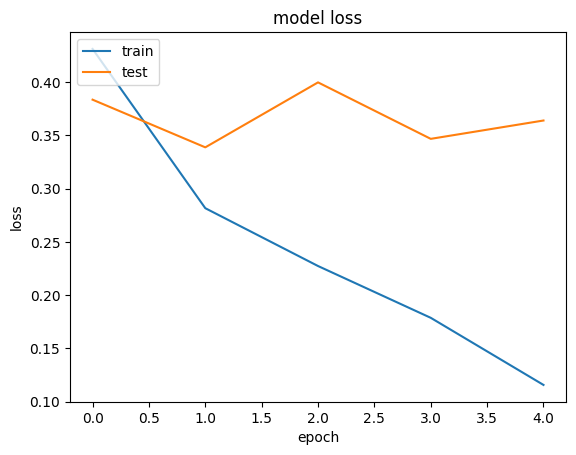

Test Score: 0.32413119077682495
Test Accuracy: 0.86080002784729


In [84]:
experience(embedding_matrix.shape[1], train_cnn_rnn)

Epoch 1/6
250/250 [==============================] - 29s 98ms/step - loss: 0.4347 - acc: 0.7903 - val_loss: 0.3228 - val_acc: 0.8626
Epoch 2/6
250/250 [==============================] - 11s 45ms/step - loss: 0.2845 - acc: 0.8851 - val_loss: 0.3155 - val_acc: 0.8664
Epoch 3/6
250/250 [==============================] - 8s 32ms/step - loss: 0.2435 - acc: 0.9023 - val_loss: 0.3118 - val_acc: 0.8661
Epoch 4/6
250/250 [==============================] - 7s 28ms/step - loss: 0.1965 - acc: 0.9248 - val_loss: 0.3421 - val_acc: 0.8591
Epoch 5/6
250/250 [==============================] - 6s 24ms/step - loss: 0.1526 - acc: 0.9455 - val_loss: 0.3995 - val_acc: 0.8605
Epoch 6/6
250/250 [==============================] - 6s 25ms/step - loss: 0.1177 - acc: 0.9595 - val_loss: 0.4548 - val_acc: 0.8551


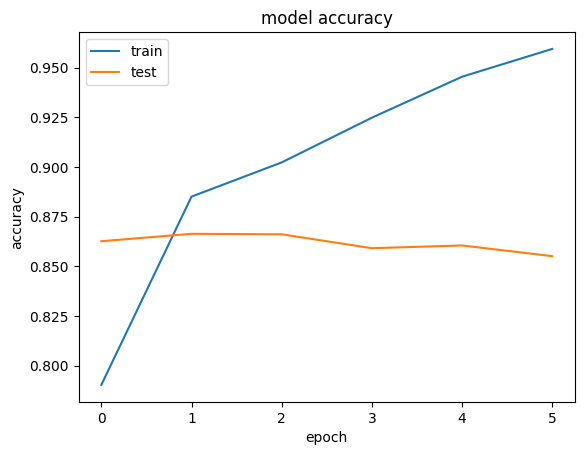

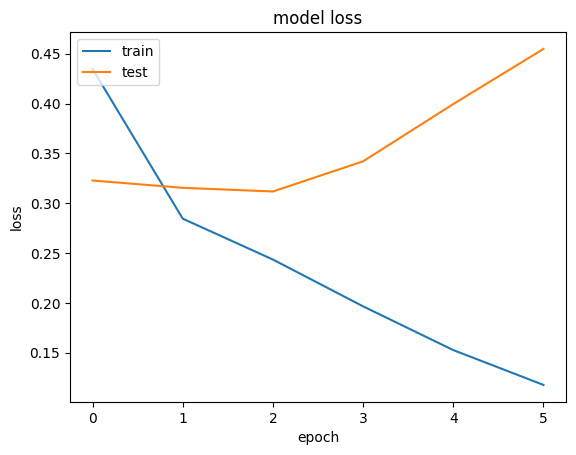

Test Score: 0.3012492060661316
Test Accuracy: 0.8690999746322632


In [85]:
experience(embedding_matrix.shape[1], train_gru)

| Modèle    | FastText |
| --------- | ----- |
| LSTM      | 0.861 |
| CNN + RNN | 0.873 |
| GRU       | 0.874 |


## TF-IDF


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(X)
tfidf_matrix = tfidf_matrix.toarray()

In [87]:
tfidf_matrix[17].shape

(1000,)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, y, test_size=0.2, random_state=42
)

In [89]:
from keras.layers import Reshape


def train_lstm_with_tfidf(output_dim=128):
    lstm_model = Sequential()
    lstm_model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    lstm_model.add(Reshape((64, 1)))

    lstm_model.add(LSTM(128))
    lstm_model.add(Dense(1, activation="sigmoid"))

    lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

    early_stopping = EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    history = lstm_model.fit(
        X_train,
        y_train,
        epochs=6,
        batch_size=128,
        verbose=1,
        validation_split=0.2,
        callbacks=[early_stopping],
        validation_data=(X_test, y_test),
    )

    return lstm_model, history


def train_cnn_rnn_with_tfidf(output_dim=128):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Reshape((64, 1)))
    model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
    model.add(MaxPooling1D())
    model.add(LSTM(units=128))
    model.add(Flatten())
    model.add(Dense(units=1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

    early_stopping = EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=6,
        batch_size=128,
        verbose=1,
        validation_split=0.2,
        callbacks=[early_stopping],
        validation_data=(X_test, y_test),
    )

    return model, history


def train_gru_with_tfidf(output_dim=128):

    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Reshape((64, 1)))
    model.add(GRU(units=128))
    model.add(Flatten())
    model.add(Dense(units=1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

    early_stopping = EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=6,
        batch_size=128,
        verbose=1,
        validation_split=0.2,
        callbacks=[early_stopping],
        validation_data=(X_test, y_test),
    )

    return model, history

The embedding layer is typically used when dealing with text data where words are represented as discrete categorical variables. It transforms these variables into continuous vectors that capture semantic meaning. However, in our case, we’re using TF-IDF vectors as input, which are already continuous and capture some level of semantic meaning. Therefore, the embedding layer might not be necessary and could even distort the TF-IDF features.


In [90]:
model, history = train_lstm_with_tfidf(128)

Epoch 1/6
313/313 [==============================] - 10s 15ms/step - loss: 0.4346 - acc: 0.7893 - val_loss: 0.3097 - val_acc: 0.8681
Epoch 2/6
313/313 [==============================] - 4s 12ms/step - loss: 0.3095 - acc: 0.8722 - val_loss: 0.3075 - val_acc: 0.8687
Epoch 3/6
313/313 [==============================] - 4s 12ms/step - loss: 0.2871 - acc: 0.8793 - val_loss: 0.3071 - val_acc: 0.8714
Epoch 4/6
313/313 [==============================] - 4s 12ms/step - loss: 0.2634 - acc: 0.8888 - val_loss: 0.3236 - val_acc: 0.8704
Epoch 5/6
313/313 [==============================] - 4s 12ms/step - loss: 0.2401 - acc: 0.9007 - val_loss: 0.3151 - val_acc: 0.8665
Epoch 6/6
313/313 [==============================] - 4s 12ms/step - loss: 0.2173 - acc: 0.9131 - val_loss: 0.3135 - val_acc: 0.8639


In [91]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.3071 - acc: 0.8714
Test Score: 0.3071185052394867
Test Accuracy: 0.871399998664856


In [92]:
from keras.layers import Conv1D, MaxPooling1D

In [93]:
model, history = train_cnn_rnn_with_tfidf(128)
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/6
313/313 [==============================] - 14s 16ms/step - loss: 0.3868 - acc: 0.8128 - val_loss: 0.3064 - val_acc: 0.8696
Epoch 2/6
313/313 [==============================] - 3s 11ms/step - loss: 0.2940 - acc: 0.8781 - val_loss: 0.3036 - val_acc: 0.8696
Epoch 3/6
313/313 [==============================] - 3s 11ms/step - loss: 0.2583 - acc: 0.8950 - val_loss: 0.3181 - val_acc: 0.8640
Epoch 4/6
313/313 [==============================] - 4s 12ms/step - loss: 0.2108 - acc: 0.9178 - val_loss: 0.3166 - val_acc: 0.8621
Epoch 5/6
313/313 [==============================] - 2s 5ms/step - loss: 0.3036 - acc: 0.8696
Test Score: 0.30358752608299255
Test Accuracy: 0.8695999979972839


In [94]:
model, history = train_gru_with_tfidf(128)
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/6
313/313 [==============================] - 8s 14ms/step - loss: 0.4280 - acc: 0.7946 - val_loss: 0.3078 - val_acc: 0.8682
Epoch 2/6
313/313 [==============================] - 3s 11ms/step - loss: 0.3058 - acc: 0.8697 - val_loss: 0.3068 - val_acc: 0.8651
Epoch 3/6
313/313 [==============================] - 3s 11ms/step - loss: 0.2923 - acc: 0.8759 - val_loss: 0.3029 - val_acc: 0.8706
Epoch 4/6
313/313 [==============================] - 4s 12ms/step - loss: 0.2755 - acc: 0.8845 - val_loss: 0.3131 - val_acc: 0.8668
Epoch 5/6
313/313 [==============================] - 4s 11ms/step - loss: 0.2513 - acc: 0.8962 - val_loss: 0.3183 - val_acc: 0.8666
Epoch 6/6
313/313 [==============================] - 2s 5ms/step - loss: 0.3029 - acc: 0.8706
Test Score: 0.3029448091983795
Test Accuracy: 0.8705999851226807


| Modèle    | Score              |
| --------- | ------------------ |
| LSTM      | 0.8693000078201294 |
| CNN + RNN | 0.8691999912261963 |
| GRU       | 0.8708000183105469 |


| Modèle    | Glove  | Word2vec | FastText | tf-idf  |
| --------- | ------ | -------- | -------- | ------- |
| LSTM      | .8655  | 0.863    | 0.861    | **0.8693**  |
| CNN + RNN | .8672  | 0.872    | **0.873**    | 0.8692  |
| GRU       | **.8768**  | 0.861    | 0.874   | 0.8708  |

GRU combined with Glove embeddings appears to be the most effective combination based on the provided results.